## Loan Classification - VemQuitar

You recently got a job as a machine learning scientist at a startup that wants to automate loan approvals. As your first project, your manager would like you to build a classifier to predict whether a loan will be paid back based on this data.
There are two things to note. First, there is class imbalance; there are fewer examples of loans not fully paid. Second, it's more important to accurately predict whether a loan will not be paid back rather than if a loan is paid back. Your manager will want to know how you accounted for this in training and evaluation your model.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

| Nome da Coluna         | Nome em Português       | Tipo de Dado   | Descrição                                                       | Valores Possíveis  |
|------------------------|-------------------------|----------------|------------------------------------------------------------------|--------------------|
| credit_policy          | Política de Crédito     | int (binário)  | 1 se o cliente atende aos critérios de crédito; 0 caso contrário.| 0, 1             |
| purpose                | Propósito               | string (qualit)| O propósito do empréstimo.                                       | Texto            |
| int_rate               | Taxa de Juros           | float (quanti) | Taxa de juros do empréstimo, mais arriscados tem taxas mais altas | 0.6 ~ 22.0%   |
| installment            | Parcela                 | float (quanti)  | Parcelas/mês devidas pelo mutuário se o empréstimo for aprovado     | $15.670 – $940.140 |
| log_annual_inc         | Log Renda Anual         | float (quanti)  | Logaritmo natural da renda anual autodeclarada do mutuário.          | $7.547 - 14.528     |
| dti                    | Razão Dívida/Renda      | float (quanti)  | Razão entre dívida e renda do mutuário.                              | 0.0 – 29.96     |
| fico                   | Score FICO              | int (quanti)    | Pontuação de crédito FICO do mutuário.                                   | 612 – 827        |
| days_with_cr_line      | Dias c/Linha de Crédito | int (quanti)    | Número de dias que o mutuário possui uma linha de crédito.             | 178 - 17.639   |
| revol_bal              | Saldo Revolvente        | float (quanti)  | Saldo pendente no fim do ciclo de faturamento do cartão de crédito| $0.00 – $1.207.359 |
| revol_util             | Uso do Crédito          | float (quanti)  | Taxa de utilização do crédito rotativo (uso do crédito disponível).    | 0.0 – 119.00     |
| inq_last_6mths         | Consultas Último 6m     | int (quanti)    | Número de consultas ao crédito feitas por credores nos últimos 6 meses. | 0 – 33         |
| delinq_2yrs            | Atrasos Últimos 2 Anos  | int (quanti)    | Número de vezes que o mutuário ficou 30+ dias em atraso nos últimos 2 anos. | 0 – 13      |
| pub_rec                | Registros Públicos      | int (quanti)    | Número de registros públicos negativos do mutuário.                     | 0 – 5          |
| not_fully_paid         | Empréstimo Não Pago     | int (binário)   | 1 se o empréstimo não foi totalmente pago; 0 caso contrário.             | 0, 1             |

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [110]:
df_VemQuitar= pd.read_csv('../data/loan_data.csv')

df_VemQuitar.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Tratamento e análise dos dados  

In [125]:
df_VemQuitar.info()
# Não possui valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [126]:
df_VemQuitar.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


| Nome da Coluna         | Nome em Português       | Tipo de Dado  | Descrição                                                       | Valores Possíveis  |
|------------------------|-------------------------|---------------|-----------------------------------------------------------------|--------------------|
| credit_policy          | Política de Crédito     | int (binário)  | 1 se o cliente atende aos critérios de crédito; 0 caso contrário.| 0, 1             |
| purpose                | Propósito               | string (qualit) | O propósito do empréstimo.                                     | Texto            |
| int_rate               | Taxa de Juros           | float (quanti)| Taxa de juros do empréstimo, mais arriscados tem taxas mais altas | 0.6 ~ 22.0%   |
| installment        | Parcela               | float (quanti)  | Parcelas/mês devidas pelo mutuário se o empréstimo for aprovado     | $15.670 – $940.140 |
| log_annual_inc     | Log Renda Anual       | float (quanti)  | Logaritmo natural da renda anual autodeclarada do mutuário.          | Número real      |
| dti               | Razão Dívida/Renda     | float (quanti)  | Razão entre dívida e renda do mutuário.                              | 0.0 – 29.96     |
| fico              | Score FICO             | int (quanti)  | Pontuação de crédito FICO do mutuário.                                   | 612 – 827        |
| days_with_cr_line | Dias com Linha de Crédito | int (quanti) | Número de dias que o mutuário possui uma linha de crédito.             | Número inteiro   |
| revol_bal         | Saldo Revolvente       | float (quanti)  | Saldo pendente no fim do ciclo de faturamento do cartão de crédito| $0.00 – $1.207.359 |
| revol_util        | Uso do Crédito         | float (quanti)  | Taxa de utilização do crédito rotativo (uso do crédito disponível).    | 0.0 – 119.00     |
| inq_last_6mths    | Consultas Últimos 6 Meses | int (quanti) | Número de consultas ao crédito feitas por credores nos últimos 6 meses. | 0 – 33         |
| delinq_2yrs       | Atrasos Últimos 2 Anos | int (quanti) | Número de vezes que o mutuário ficou 30+ dias em atraso nos últimos 2 anos. | 0 – 13      |
| pub_rec           | Registros Públicos     | int (quanti) | Número de registros públicos negativos do mutuário.                     | 0 – 5          |
| not_fully_paid    | Empréstimo Não Pago    | int (binário) | 1 se o empréstimo não foi totalmente pago; 0 caso contrário.             | 0, 1             |

In [ ]:
df_VemQuitar.duplicated().sum()

# Não tem valores duplicados

In [ ]:
df_VemQuitar.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Payments vs Non-Payments')

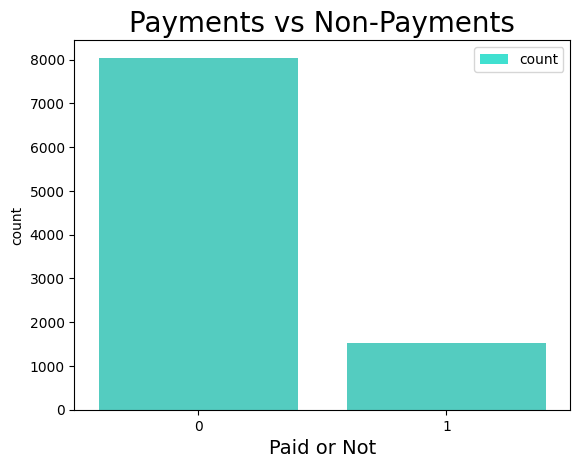

In [69]:
df_VemQuitar['not.fully.paid'].value_counts().plot(kind='bar', color='#40E0D0')
sns.countplot(x='not.fully.paid', color= '#40E0D0', data=df_VemQuitar)
plt.xlabel('Paid or Not', fontsize=14)
plt.xticks(rotation=0)
plt.title('Payments vs Non-Payments', size=20)

### Observando o gráfico, vemos que o número de pessoas que pagaram o empréstimo que tomaram foi maior do que quando comparado aos que não pagaram. 

-------------------------------------------------------------------------------------------------

In [73]:
df_VemQuitar.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

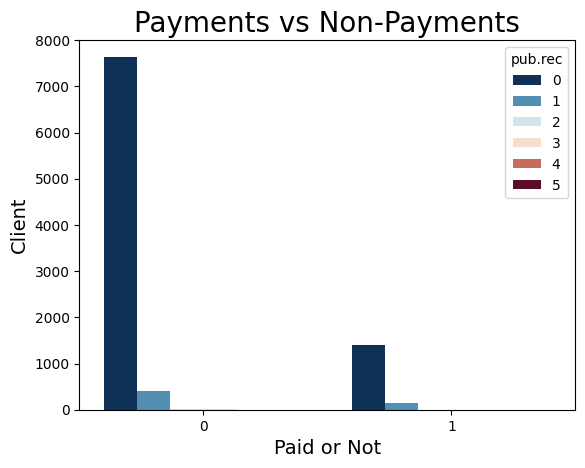

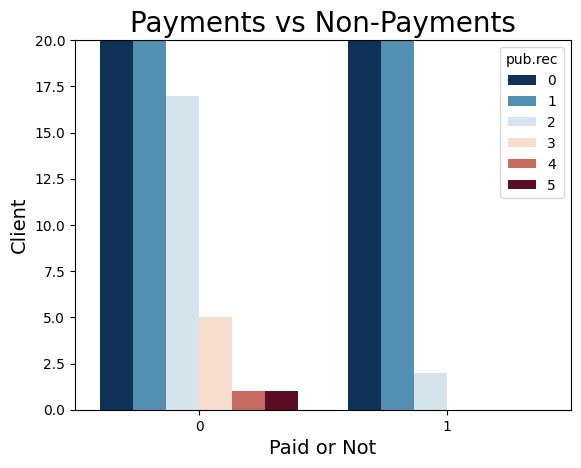

In [102]:
sns.countplot(x='not.fully.paid', hue='pub.rec', data=df_VemQuitar, palette='RdBu_r')
plt.xlabel('Paid or Not', fontsize=14)
plt.ylabel('Client', fontsize=14)  # Modificando o nome do eixo Y
plt.xticks(rotation=0)
plt.ylim(0, 8000)
plt.title('Payments vs Non-Payments', fontsize=20)
plt.show()

sns.countplot(x='not.fully.paid', hue='pub.rec', data=df_VemQuitar, palette='RdBu_r')
plt.xlabel('Paid or Not', fontsize=14)
plt.ylabel('Client', fontsize=14)  # Modificando o nome do eixo Y
plt.xticks(rotation=0)
plt.ylim(0, 20)
plt.title('Payments vs Non-Payments', fontsize=20)
plt.show()


### Ao observar o primeiro gráfico podemos inquirir que a quantidade de bons pagadores pode está diretamente ligado a quantidade de número de registros públicos negativos, visto que a maioria dos bons pagadores não possuem registros negativos em seu nome. Entretanto, existe ainda um número de credores que pagaram seus empréstimos porém, eles tem 3 ou mais registros negativos no nome, bem como existem maus pagadores, que não finalizaram o pagamento dos seus empréstimos, que não obtinham registros negativos em seu nome. E é para mitigar esses números que esse estudo continua a seguir.  
---------------------------------------------------

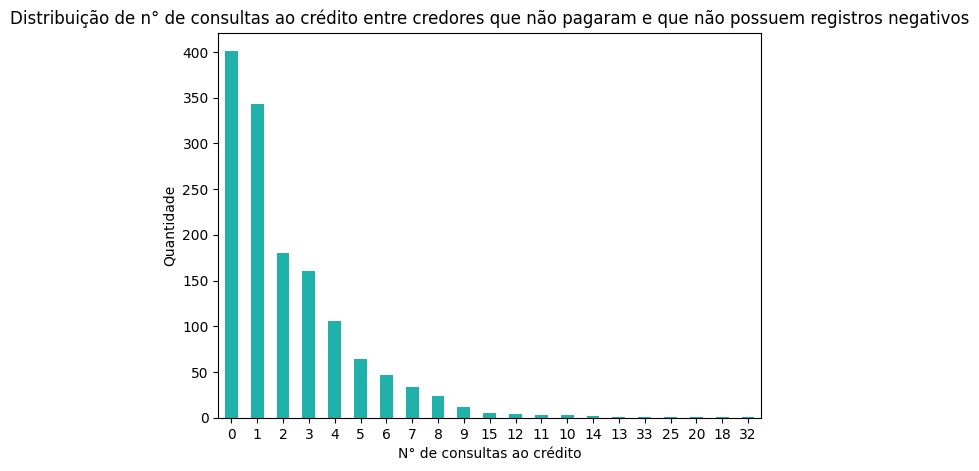

In [121]:
filtered_df = df_VemQuitar[(df_VemQuitar["not.fully.paid"] == 1) & (df_VemQuitar["pub.rec"] == 0)]

inq_counts = filtered_df["inq.last.6mths"].value_counts()

plt.figure(figsize=(7, 5))
inq_counts.plot(kind="bar", color="lightseagreen")
plt.xlabel("N° de consultas ao crédito")
plt.xticks(rotation=0)
plt.ylabel("Quantidade")
plt.title("Distribuição de n° de consultas ao crédito entre credores que não pagaram e que não possuem registros negativos")
plt.show()

### Podemos observar dentre os não pagadores que apesar deles não terem registros negativos, muitos já tinham tentando outras linhas de crédito ao ponto de terem seus registros pesquisados nos últimos 6 meses. 

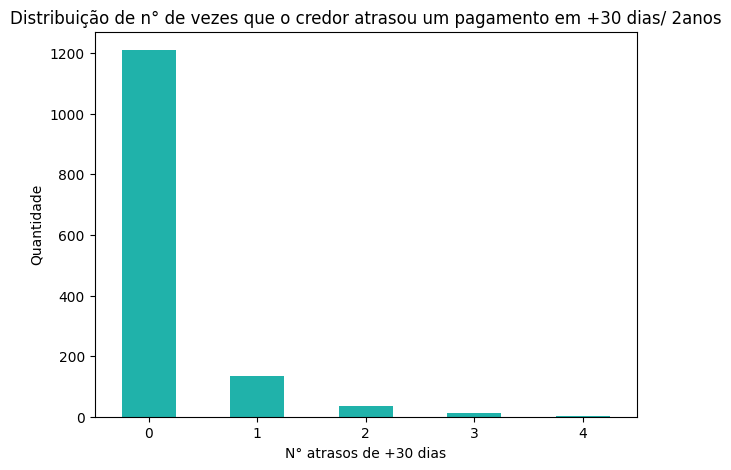

In [122]:
filtered_df = df_VemQuitar[(df_VemQuitar["not.fully.paid"] == 1) & (df_VemQuitar["pub.rec"] == 0)]
inq_counts = filtered_df["delinq.2yrs"].value_counts()
plt.figure(figsize=(7, 5))
inq_counts.plot(kind="bar", color="lightseagreen")


plt.xlabel("N° atrasos de +30 dias")
plt.xticks(rotation=0)
plt.ylabel("Quantidade")
plt.title("Distribuição de n° de vezes que o credor atrasou um pagamento em +30 dias/ 2anos")
plt.show()



In [124]:
novos_maus_pagadores = df_VemQuitar[(df_VemQuitar["not.fully.paid"] == 1) & (df_VemQuitar["pub.rec"] == 0) & (df_VemQuitar["delinq.2yrs"]==0)].value_counts()
aux = len(novos_maus_pagadores)
aux

1210

### Cerca de 1210 credores estavam totalmente fora do radar da inadimplência pois, não tinham registros negatvos em seu nome e dentre 2 anos não tinham atrasados contas com mais de 30 dias, tornando difícil o reconhecimento de padrões ruins dificultando assim uma possível negativa de empréstimo. 
--------------------------------------- 

# 